### Exploratory Data Analysis and Data Processing

#### Feature Descriptions
* CustomerId: Unique identifier for each customer.
* Surname: Customer's last name.
* CreditScore: Customer's credit score.
* Geography: Country of the customer.
* Gender: Gender of the customer.
* Age: Age of the customer.
* Tenure: Number of years the customer has been with the bank.
* Balance: Customer's account balance.
* NumOfProducts: Number of products the customer has with the bank.
* HasCrCard: Whether the customer has a credit card (1: Yes, 0: No).
* IsActiveMember: Whether the customer is an active member (1: Yes, 0: No).
* EstimatedSalary: Estimated customer salary.
* Exited: Whether the customer has churned (1: Yes, 0: No).


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

In [2]:
# Load the data
churn_df = pd.read_csv('churn_modelling.csv')

In [3]:
# View the first 5 rows
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# View the last 2 rows
churn_df.tail(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Data Exploration

In [5]:
# 10,000 records and 14 features, with diverse data types. No null values.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset has 10,000 records and 14 features, with diverse data types. No null values.

In [6]:
# Summary statistics
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Customers' credit scores range from 350 to 850, with 650 as the average.
- Customers' ages range from 18 to 92 years, with a mean age of 38.92 +/- 10.49.
- Customer tenure ranges from 0 to 10 years. The median and average tenure is 5 years.
- Customer balance ranges from 0 to 250,898.09, indicating a widespread (std of 62397.41).
- The number of products customers have range from 1 to 4.
- Customer salaries range from 11.58 to 199992.48, suggesting high variability (std of 57510.49).
- Binary columns include HasCrCard, IsActiveMember, and Exited. 
- Exited is the response variable.

In [7]:
# Categorical data
churn_df.describe(include = 'O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


- 2932 unique last names, with Smith being the most prevalent.
- 3 distinct countries, with France having the most customers.
- 2 genders, with Males being the majority (5457 customers).

In [8]:
# Check for duplicates
churn_df.duplicated().sum()

0

No duplicates found in the data

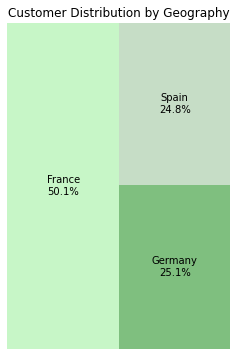

In [9]:
# Treemap - Customer Distribution by Geography
data = churn_df['Geography'].value_counts()
# Calculate percentages and round to one decimal
percentages = (data / data.sum() * 100).round(1)  
labels = [f'{index}\n{percent}%' for index, percent in zip(data.index, percentages)]

plt.figure(figsize=(4, 6))
colors = ['lightgreen', 'green', 'darkseagreen']
squarify.plot(sizes=data.values, label=labels, alpha=0.5, color=colors)
plt.title('Customer Distribution by Geography')
plt.axis('off')  # Hide the axis
plt.show()

- France accounts for the majority of customers, followed by Germany and Spain ranking second and third.

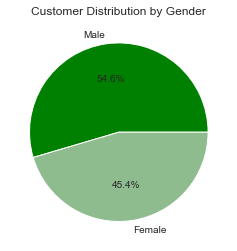

In [10]:
# Pie Graph - Gender Distribution
data= churn_df['Gender'].value_counts()
labels = ['Male', 'Female']

sns.set_style('whitegrid') # Set style for chart
plt.figure(figsize=(4,6)) # Set figure size
plt.pie(data, autopct='%1.1f%%', colors=['green', 'darkseagreen'], labels = labels ) 
plt.title('Customer Distribution by Gender')
plt.show() # Show chart


- The customer base is predominantly male, with males accounting for 54.57% of customers, while females account for 45.43%.

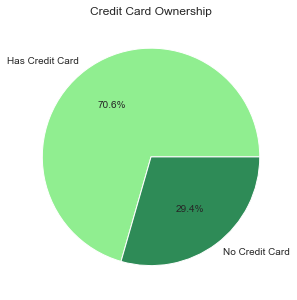

In [11]:
# Pie Graph - Credit Card Ownership
data= churn_df['HasCrCard'].value_counts()
labels = ['Has Credit Card', 'No Credit Card']

sns.set_style('whitegrid') # Set style for chart
plt.figure(figsize=(5,5)) # Set figure size
plt.pie(data, autopct='%1.1f%%', colors=['lightgreen', 'seagreen'], labels = labels ) 
plt.title('Credit Card Ownership')
plt.show() # Show chart

- Approximately 70.6% of customers own a credit card. 
- In contrast, 29.4% of customer do not own a credit card.

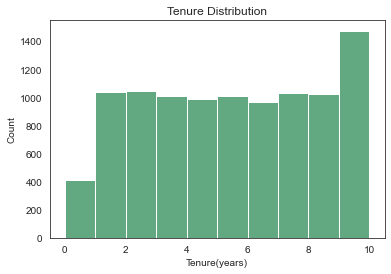

In [12]:
# Bar Plot - Tenure Distribution
sns.set_style('white')
sns.histplot(churn_df['Tenure'], bins=10, color='seagreen')
plt.title('Tenure Distribution')
plt.xlabel('Tenure(years)')
plt.ylabel('Count')
plt.show()

- Customer tenure ranges from 0 to 10 years, with the majority at 10 years.
- Customers with 2-8 years of tenure have similar frequencies.

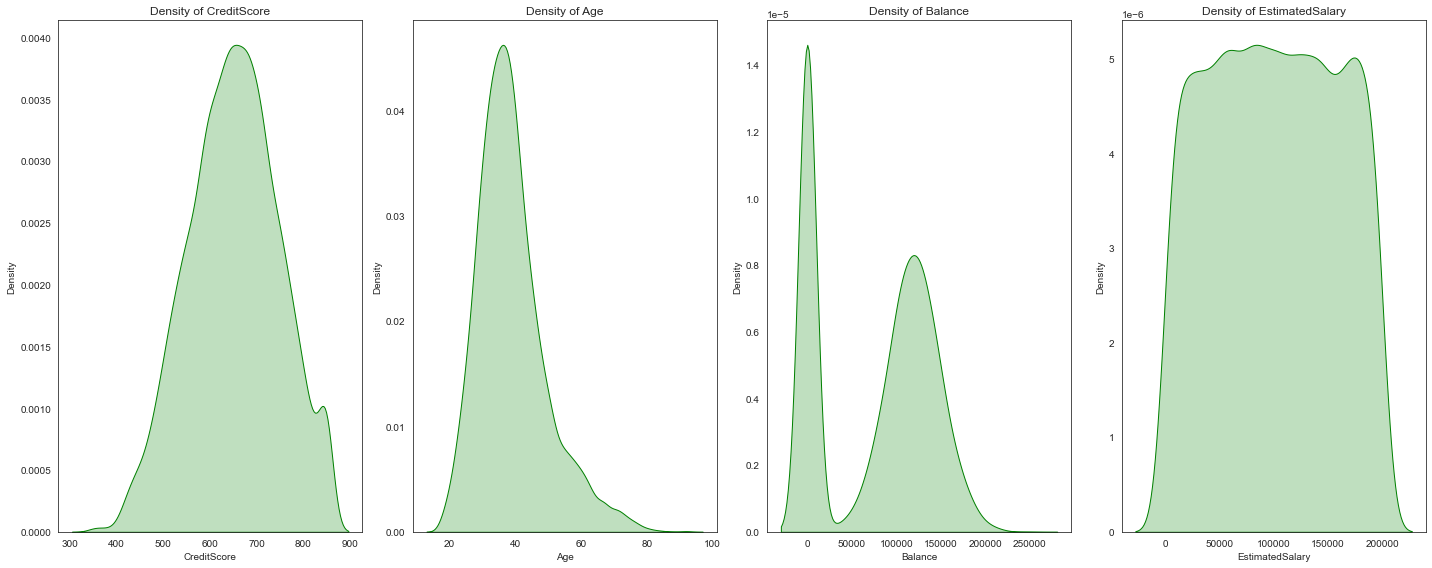

In [13]:
# Density plot for numerical features
sns.set_style('white')
num_features = churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

fig, axs = plt.subplots(nrows=1, ncols=len(num_features.columns), figsize=(20, 8))

for i in range(len(num_features.columns)):
    sns.kdeplot(num_features[num_features.columns[i]], ax=axs[i], fill=True, color='green')
    axs[i].set_title(f'Density of {num_features.columns[i]}')

plt.tight_layout()
plt.show()

In [14]:
# Review skewness of numerical features
churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].skew()

CreditScore       -0.071607
Age                1.011320
Balance           -0.141109
EstimatedSalary    0.002085
dtype: float64

In [15]:
#churn_df['Balance'].value_counts().sort_values()[0]

##### Credit Score Distribution
- The illustration of credit scores indicates that most customers credit scores between 600 and 700.
- Around 800+, there is a small group of customers with high credit scores.
- The skewness value, `-0.071607`, suggests the data is minimally skewed to the left, but overall, it is close to being normally distributed.

#####  Age Distribution
- The age distribution is right-skewed, with a skewness value of `1.011320`. 
- The majority of customers are between 20 and 50 years old.

##### Balance Distribution
- Bimodal distribution with two distinct peaks.


##### Estimated Salary Distribution
- The plot shows that salaries are relatively evenly distributed. 
- The distribution of salaries is slightly positive skew, with a skewness value of `0.002085`, and there is a minimal presence of extreme outliers.

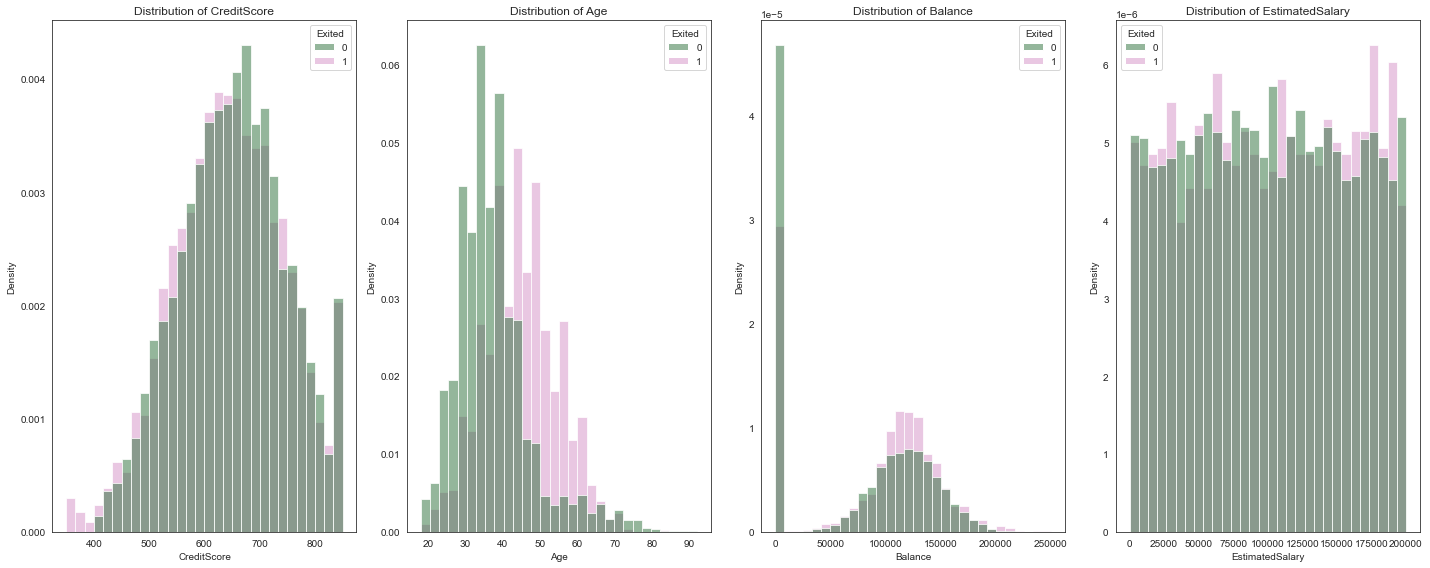

In [16]:
# Historgam of numerical features.

num_features = churn_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]
fig, axs = plt.subplots(nrows=1, ncols=len(num_features.columns)-1, figsize=(20, 8))

for i in range(len(num_features.columns)-1):
    sns.histplot(data=num_features, x=num_features.columns[i], ax=axs[i], hue='Exited',stat='density',
                 common_norm=False, bins=30, palette='cubehelix')
    axs[i].set_title(f'Distribution of {num_features.columns[i]}')

plt.tight_layout()
plt.show()

- Credit scores range from 350 to 850, and customers who churned tend to have lower credit scores, with a peak occurring at approximately 633. 
- Most customers churn at age 45 and older. 
- The estimated salary is mostly evenly distributed across both groups.  

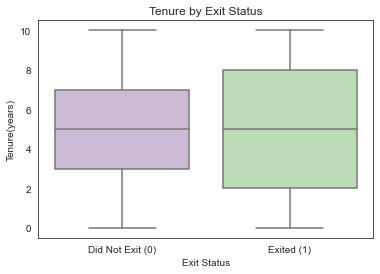

In [17]:
#  Box Plot - Tenure and Exited
sns.set_style('white')
sns.boxplot(x='Exited', y='Tenure', data=churn_df, palette = 'PRGn')
plt.title('Tenure by Exit Status')
plt.xlabel('Exit Status')
plt.xticks([0, 1], ['Did Not Exit (0)', 'Exited (1)'])
plt.ylabel('Tenure(years)')
plt.show()


- The tenure for customers who either stayed or left the bank ranges from 0 to 10 years. 
- Both groups have a median tenure of 5 years.

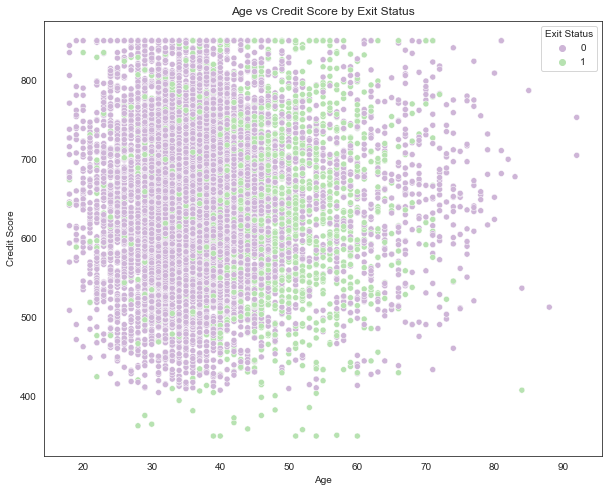

In [18]:
# Scatter Plot- Age and Credit Score by Exit Status
plt.figure(figsize = (10, 8))
colors = ['Dark']
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=churn_df, palette = 'PRGn')

plt.title('Age vs Credit Score by Exit Status')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exit Status')
plt.show()

- The credit scores for customers who stayed or churned range from 350 to 850.
- Most customers have credit scores around 600 to 800, with a few outliers above 800.
- The illustration reveals no clear relationship between age, credit score, and customer churn.

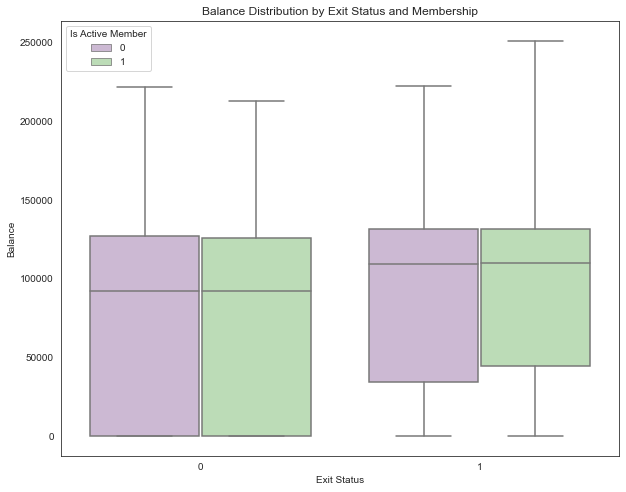

In [19]:
#Box Plot - Balance Distribution, Exit Status, and Membership Status
plt.figure(figsize=(10,8))
sns.boxplot(x='Exited', y='Balance', hue='IsActiveMember', data=churn_df, palette = 'PRGn')

plt.title('Balance Distribution by Exit Status and Membership')
plt.xlabel('Exit Status')
plt.ylabel('Balance')
plt.legend(title='Is Active Member', loc='upper left')
plt.show()

- Active and inactive customers have similar balance distribution regardless of churn status.
- The balance distribution does not show a significant difference between customers who churned and those who did not.

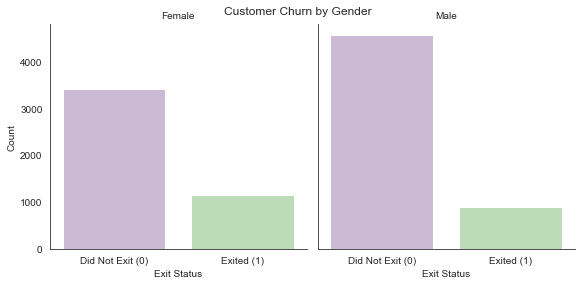

In [20]:
# Faceted Count Plot- customer churn by gender.
sns.set_style('white')
g = sns.FacetGrid(churn_df, col='Gender', hue='Exited', height=4, aspect=1, palette='PRGn')
g.map(sns.countplot, 'Exited', order=[0, 1])

g.set_titles(col_template='{col_name}')
g.set_axis_labels('Exit Status', 'Count')
g.set_xticklabels(['Did Not Exit (0)', 'Exited (1)'])
g.fig.suptitle('Customer Churn by Gender')
plt.show()

In [21]:
rate_of_exit_gender = churn_df.groupby('Gender')['Exited'].mean()
rate_of_exit_gender.round(2)

Gender
Female    0.25
Male      0.16
Name: Exited, dtype: float64

- On average, male customers have lower churn rates compared to female customers.

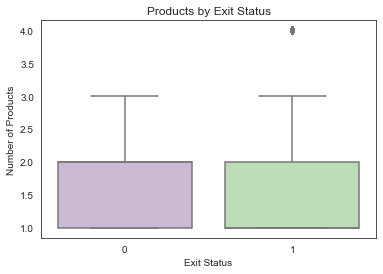

In [22]:
# Number of Products and Exit Status
sns.set_style('white')
sns.boxplot(x='Exited', y='NumOfProducts', data=churn_df, palette='PRGn')
plt.title('Products by Exit Status')
plt.xlabel('Exit Status')
plt.ylabel('Number of Products')
plt.show()

- The median number of products across both groups is 1.
- In the churned group, there are outliers, customers with four products.

<AxesSubplot:>

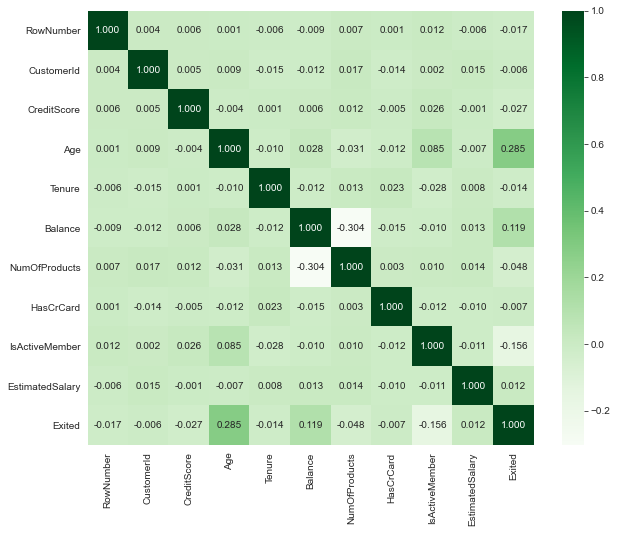

In [23]:
corr = churn_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap='Greens', fmt='.3f')

- There is a weak positive correlation (0.29) between age and customer churn.
- The correlation heatmap shows that customer churn does not strongly correlate with any other feature.

## Data Preprocessing

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [25]:
# Drop irrelevant features 
churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [26]:
# Drop observations where the Balance column has a value of 0
churn_df = churn_df[churn_df['Balance'] != 0].reset_index(drop=True)
churn_df.sort_values(by = 'Balance') # confirm that zero balances were dropped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5396,753,France,Female,40,0,3768.69,2,1,0,177065.24,1
3640,644,Spain,Female,46,6,12459.19,1,0,0,156787.34,1
1158,702,Spain,Female,35,8,14262.80,2,1,0,54689.16,0
3245,707,France,Male,42,2,16893.59,1,1,1,77502.56,0
3852,659,France,Female,44,9,23503.31,1,0,1,169862.01,1
...,...,...,...,...,...,...,...,...,...,...,...
4289,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
2316,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
5576,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
2122,583,France,Female,57,3,238387.56,1,0,1,147964.99,1


In [27]:
# # Create a flag for high, low, and middle-income

def income_flag(salary):
    if salary < 56600:
        return 'Low'
    elif salary <= 169800:
        return 'Middle'
    else:
        return 'High'

churn_df['income_flag'] = churn_df['EstimatedSalary'].apply(income_flag)
#churn_df.head()

In [28]:
# Create a flag for high, medium, and low balance.
def balance_flag(balance):
    if balance <25000:
        return 'Low'
    if balance <= 75000:
        return 'Medium'
    else:
        return 'High'
    
churn_df['balance_flag'] = churn_df['Balance'].apply(balance_flag)  
#churn_df.head()

In [29]:
# Define features 
categorical_features = ['Geography', 'Gender', 'income_flag', 'balance_flag']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
target_feature = 'Exited'

# One-hot encode categorical features
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(churn_df[categorical_features])
one_hot_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(categorical_features))

# Concatenate original dataframe (excluding categorical features) with encoded data
encoded_df = pd.concat([churn_df.drop(categorical_features, axis=1), one_hot_df], axis=1)

# Scale numerical features
scaler = StandardScaler()
numerical_df = encoded_df.drop([target_feature], axis=1)
X_scaled = scaler.fit_transform(numerical_df)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_df.columns)


In [30]:
#X_scaled_df.head()